Task 2 .1 Logistic regression for Binary classification

step 1 Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load and Inspect the Dataset
Assume your dataset is named "churn_data.csv" and target column is "churn" (1 = Yes, 0 = No)

In [9]:
df = pd.read_csv("../DataSet/Churn_Prdiction_Data/churn-bigml-80.csv")  # Replace with actual filename
print(df.head())
print(df.info())


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

Step 3: Preprocess the Dataset
Handle missing values

Encode categorical variables

Scale features

In [18]:
churn = df["Churn"]
churn.head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

In [26]:
# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


step 4 split data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


step 5 train logistic regression model

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Step 6: Interpret Coefficients & Odds Ratio

In [37]:
import numpy as np

coefficients = model.coef_[0]
features = X.columns
for feature, coef in zip(features, coefficients):
    print(f"{feature}: coef = {coef:.4f}, odds ratio = {np.exp(coef):.4f}")


Account length: coef = 0.0660, odds ratio = 1.0682
Area code: coef = -0.0360, odds ratio = 0.9646
Number vmail messages: coef = 0.3898, odds ratio = 1.4767
Total day minutes: coef = 0.3902, odds ratio = 1.4773
Total day calls: coef = 0.0919, odds ratio = 1.0963
Total day charge: coef = 0.3893, odds ratio = 1.4760
Total eve minutes: coef = 0.1566, odds ratio = 1.1695
Total eve calls: coef = -0.0112, odds ratio = 0.9888
Total eve charge: coef = 0.1555, odds ratio = 1.1683
Total night minutes: coef = 0.0869, odds ratio = 1.0908
Total night calls: coef = -0.0578, odds ratio = 0.9438
Total night charge: coef = 0.0843, odds ratio = 1.0879
Total intl minutes: coef = 0.1360, odds ratio = 1.1457
Total intl calls: coef = -0.3068, odds ratio = 0.7358
Total intl charge: coef = 0.1460, odds ratio = 1.1572
Customer service calls: coef = 0.6832, odds ratio = 1.9801
State_AL: coef = 0.0564, odds ratio = 1.0580
State_AR: coef = 0.0987, odds ratio = 1.1038
State_AZ: coef = 0.0509, odds ratio = 1.0522
St

Step 7: Evaluate Model Performance

              precision    recall  f1-score   support

       False       0.88      0.95      0.91       455
        True       0.43      0.24      0.31        79

    accuracy                           0.84       534
   macro avg       0.65      0.59      0.61       534
weighted avg       0.81      0.84      0.82       534



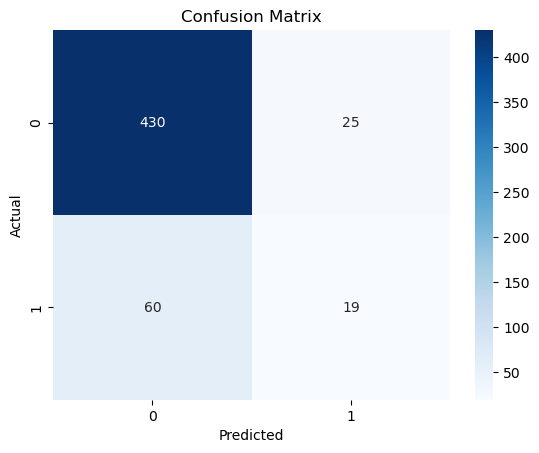

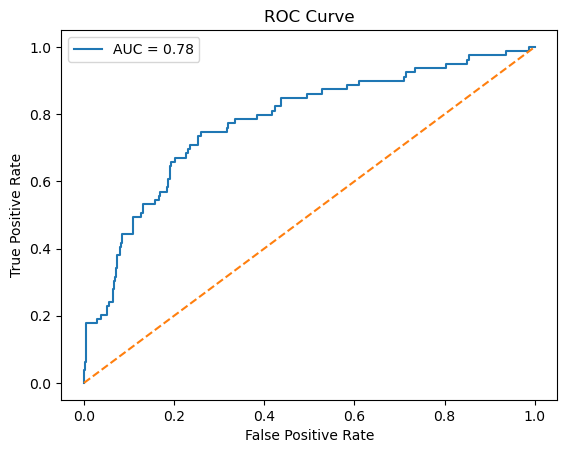

In [40]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy, Precision, Recall
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
